In [125]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')

In [126]:
# Features Description
Feat_described = pd.read_excel('Healthcare_dataset.xlsx')

Feat_described

,Bucket,Variable,Variable Description
0,Unique Row Id,Patient ID,Unique ID of each patient
1,Target Variable,Persistency_Flag,Flag indicating if a patient was persistent or...
2,Demographics,Age,Age of the patient during their therapy
3,NaN,Race,Race of the patient from the patient table
4,NaN,Region,Region of the patient from the patient table
5,NaN,Ethnicity,Ethnicity of the patient from the patient table
6,NaN,Gender,Gender of the patient from the patient table
7,NaN,IDN Indicator,Flag indicating patients mapped to IDN
8,Provider Attributes,NTM - Physician Specialty,Specialty of the HCP that prescribed the NTM Rx
9,Clinical Factors,NTM - T-Score,T Score of the patient at the time of the NTM ...


In [127]:
# Read data into DataFrame
df = pd.read_excel('Healthcare_dataset.xlsx', sheet_name='Dataset')

df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


In [128]:
# Dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

In [129]:
# Numerical data properties
df.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


There 68 independent variable and one target variable. 66 of the 68 independent variables are categorical variables and 2 are numerical variables.

In [130]:
# Duplicated values
print(f'Duplicated Values: {df.duplicated(subset="Ptid").sum()}')


Duplicated Values: 0


In [131]:
# In the  dataframe, the null values were written as unknown, hence the need for transformation

# Replacing the unknown values with NAN
df = df.replace('Unknown', np.nan)
df = df.replace('Other/Unknown', np.nan)

Checking and handling missing values

In [132]:
# Missing Values
print(f'Missing Values: {df.isnull().sum().sum()}')

Missing Values: 7278


In [133]:
# Columns with missing values
columns_with_na = df.isnull().sum()
columns_with_na[columns_with_na > 0]

Race                         97
Ethnicity                    91
Region                       60
Ntm_Speciality              310
Risk_Segment_During_Rx     1497
Tscore_Bucket_During_Rx    1497
Change_T_Score             1497
Change_Risk_Segment        2229
dtype: int64

It is recommended to exclude demographic features like 'Race', 'Ethnicity', and 'Region' from the machine learning model as they are unlikely to provide significant contributions. Similarly, considering the large proportion of missing values relative to the total number of rows (3423), it is advisable to drop 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx', 'Change_T_Score', and 'Change_Risk_Segment' to maintain the integrity and effectiveness of the model.

In [134]:
# df.drop(['Race', 'Ethnicity', 'Region', 'Risk_Segment_During_Rx', 'Tscore_Bucket_During_Rx',
        #  'Change_T_Score', 'Change_Risk_Segment'], axis = 1, inplace = True)

# Explorative Data Analysis

## Distribution of the numerical columns

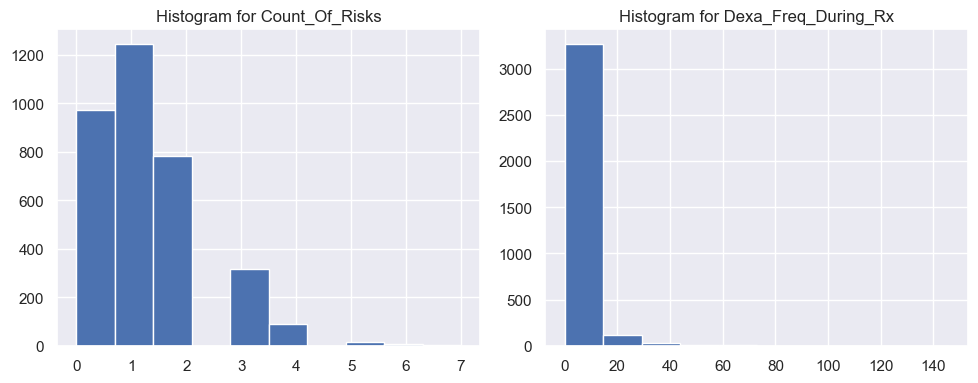

In [135]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(df['Count_Of_Risks'])
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(df['Dexa_Freq_During_Rx'])
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

TypeError: Axes.hist() missing 1 required positional argument: 'x'

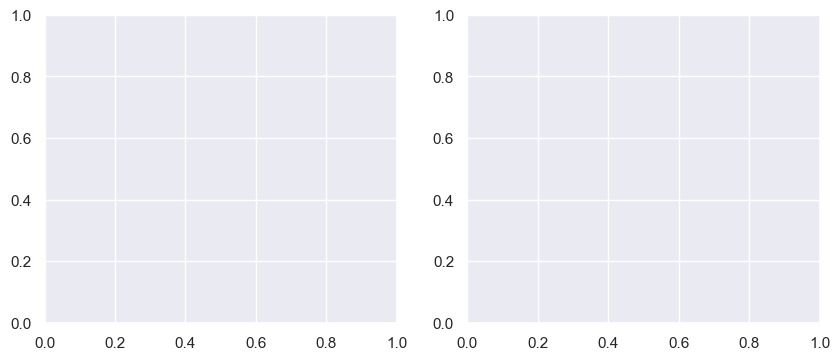

In [136]:
# Create a subplot with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot the histogram for 'Count_Of_Risks' in the first subplot
axes[0].hist(y=transformed_count_of_risks)
axes[0].set_title('Histogram for Count_Of_Risks')

# Plot the histogram for 'Dexa_Freq_During_Rx' in the second subplot
axes[1].hist(y=transformed_dexa_freq_during_rx)
axes[1].set_title('Histogram for Dexa_Freq_During_Rx')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [124]:
plt.hist(y=transformed_dexa_freq_during_rx)

TypeError: hist() missing 1 required positional argument: 'x'

## Identifying and Handling Outliers

### Identifying Outliers

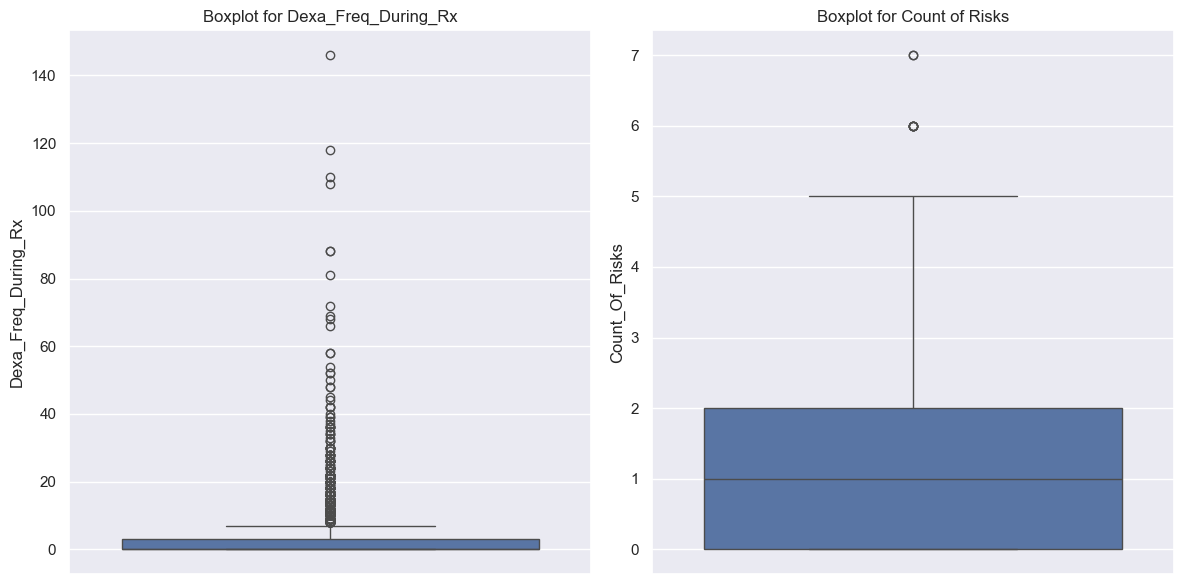

In [103]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Dexa_Freq_Level'
sns.boxplot(y=df['Dexa_Freq_During_Rx'], ax=axes[0])
axes[0].set_title('Boxplot for Dexa_Freq_During_Rx')
axes[0].set_ylabel('Dexa_Freq_During_Rx')

# Boxplot for 'Risk_Level'
sns.boxplot(y=df['Count_Of_Risks'], ax=axes[1])
axes[1].set_title('Boxplot for Count of Risks')
axes[1].set_ylabel('Count_Of_Risks')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

There are outliers in the 'Dexa_Freq_During_Rx' and 'Count of Risks' columns

### Handling Outliers

<Figure size 1200x500 with 0 Axes>

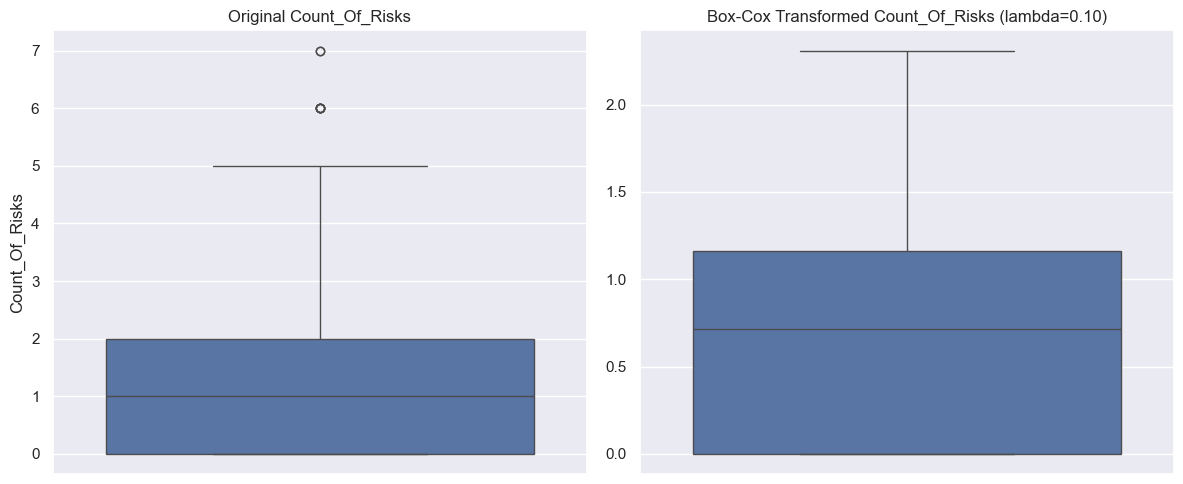

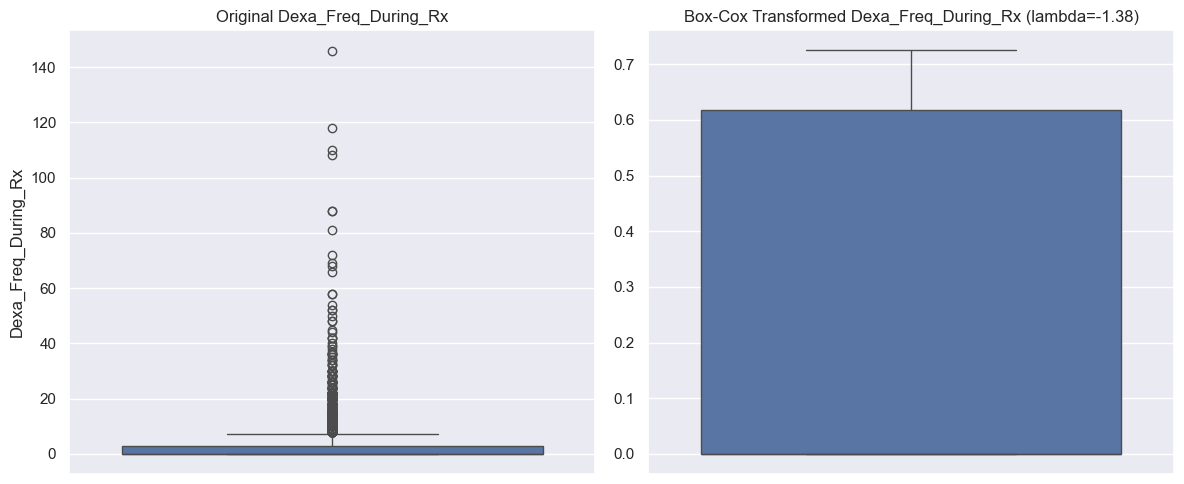

In [104]:
original_count_of_risks = df['Count_Of_Risks']
original_dexa_freq_during_rx = df['Dexa_Freq_During_Rx']


# Adding a constant to make 'Count_Of_Risks' values positive
constant_value_count_of_risks = 1
positive_count_of_risks = original_count_of_risks + constant_value_count_of_risks

# Applying the Box-Cox transformation for 'Count_Of_Risks'
transformed_count_of_risks, lambda_count_of_risks = boxcox(positive_count_of_risks)

# Adding a constant to make 'Dexa_Freq_During_Rx' values positive
constant_value_dexa_freq_during_rx = 1  # Addin 1 to all values to make it greater than zero
positive_dexa_freq_during_rx = original_dexa_freq_during_rx + constant_value_dexa_freq_during_rx

# Applying the Box-Cox transformation for 'Dexa_Freq_During_Rx'
transformed_dexa_freq_during_rx, lambda_dexa_freq_during_rx = boxcox(positive_dexa_freq_during_rx)

# Plotting the original and transformed data for 'Count_Of_Risks'
plt.figure(figsize=(12, 5))

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Count_Of_Risks'
sns.boxplot(y=original_count_of_risks, ax=axes[0])
axes[0].set_title('Original Count_Of_Risks')

sns.boxplot(y=transformed_count_of_risks, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Count_Of_Risks (lambda={lambda_count_of_risks:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

# Set up subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for 'Dexa_Freq_During_Rx'
sns.boxplot(y=original_dexa_freq_during_rx, ax=axes[0])
axes[0].set_title('Original Dexa_Freq_During_Rx')

sns.boxplot(y=transformed_dexa_freq_during_rx, ax=axes[1])
axes[1].set_title(f'Box-Cox Transformed Dexa_Freq_During_Rx (lambda={lambda_dexa_freq_during_rx:.2f})')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [105]:
# Print Lambda Function
print(f'Count of Risks estimated lambda function: {lambda_count_of_risks}')
print(f'Dexa Freq During Rx estimated lambda function: {lambda_dexa_freq_during_rx}')

Count of Risks estimated lambda function: 0.09947523122712457
Dexa Freq During Rx estimated lambda function: -1.3784802096724922


## Imbalance

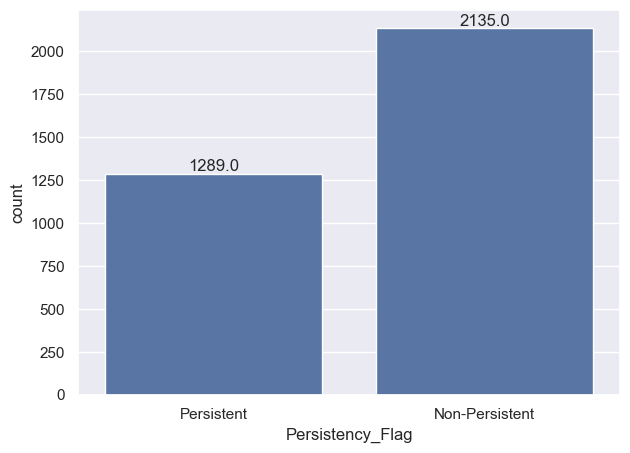

In [106]:
# Create the countplot
ax = sns.countplot(data=df, x='Persistency_Flag')

# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

# Show the plot
plt.show()

The dataseet is imbalanced

Problems in the dataset
-   Outliers
-   Not normally distributed
-   Imbalanced

How to handle the problems in the dataset

## Demographic Properties Analysis
> - Gender
> - Race
> - Ethinicity

In [107]:
df.columns

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Com

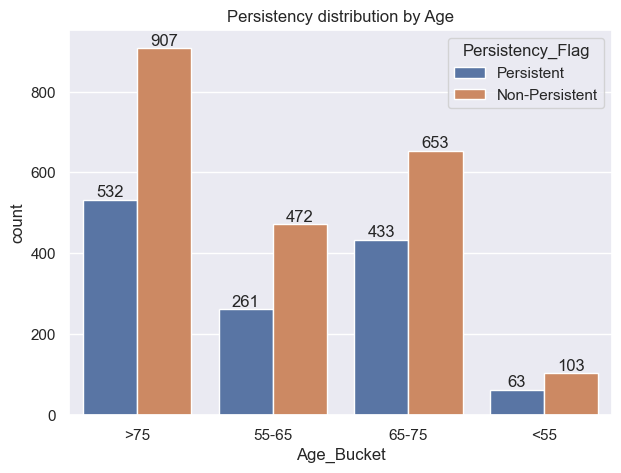

In [108]:
sns.set(rc = {'figure.figsize':(7,5)})
ax = sns.countplot(x='Age_Bucket', 
                   data= df, 
                   hue='Persistency_Flag' 
                   )
ax.set_title('Persistency distribution by Age')
for label in ax.containers:
    ax.bar_label(label)

Majority of the patients recorded are above 75

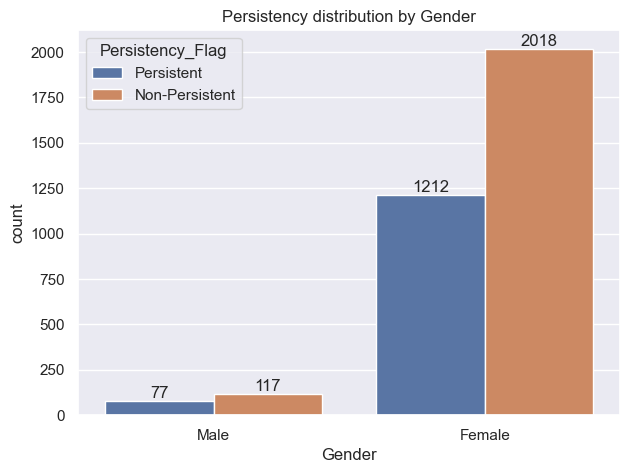

In [109]:
sns.set(rc = {'figure.figsize':(7,5)})
ax = sns.countplot(x='Gender', 
                   data= df, 
                   hue='Persistency_Flag')
ax.set_title('Persistency distribution by Gender')
for label in ax.containers:
    ax.bar_label(label)

Majority of the gender recorded is female. Hence it is advisable to drop the 'Gender' feature as it would not contribute to the model

In [110]:
df.drop('Gender', axis=1, inplace=True)

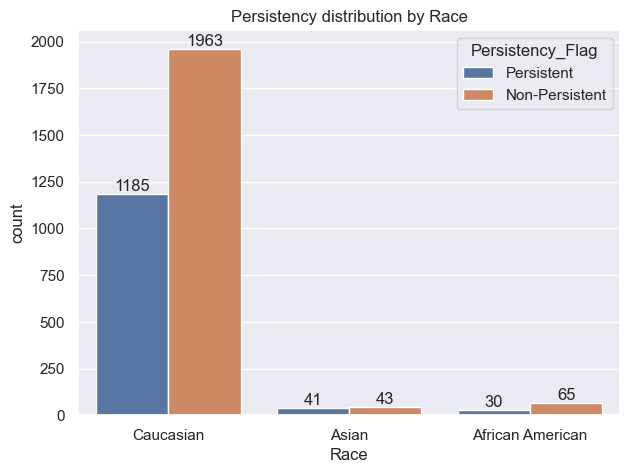

In [111]:
sns.set_theme(rc = {'figure.figsize':(7,5)})
ax = sns.countplot(x='Race', 
                   data=df, 
                   hue='Persistency_Flag')
ax.set_title('Persistency distribution by Race')
for label in ax.containers:
    ax.bar_label(label)

Majority of the recorded patients are Caucacians. Hence it is advisable to drop the 'Race' feature as it would not contribute to the model

In [112]:
df.drop('Race', axis= 1, inplace= True)

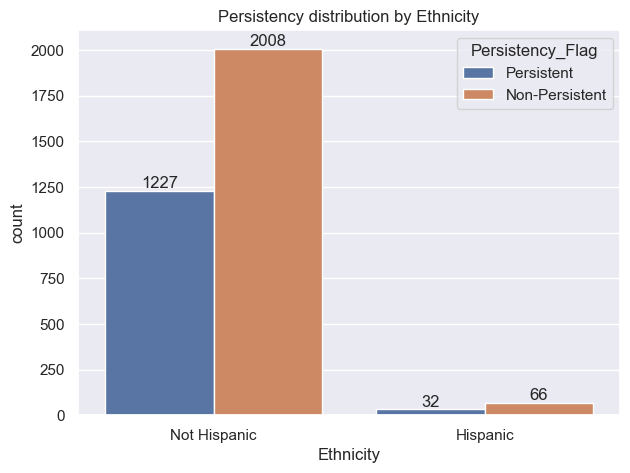

In [113]:
sns.set_theme(rc = {'figure.figsize':(7,5)})
ax = sns.countplot(x='Ethnicity', 
                   data= df, 
                   hue='Persistency_Flag'
                   )
ax.set_title('Persistency distribution by Ethnicity')
for label in ax.containers:
    ax.bar_label(label)

The majority of the patients recorded are 'Not Hispanic'. Hence it is advisable to drop the 'Race' feature as it would not contribute to the model and would rather add bias.

In [114]:
df.drop('Ethnicity', axis = 1, inplace = True)

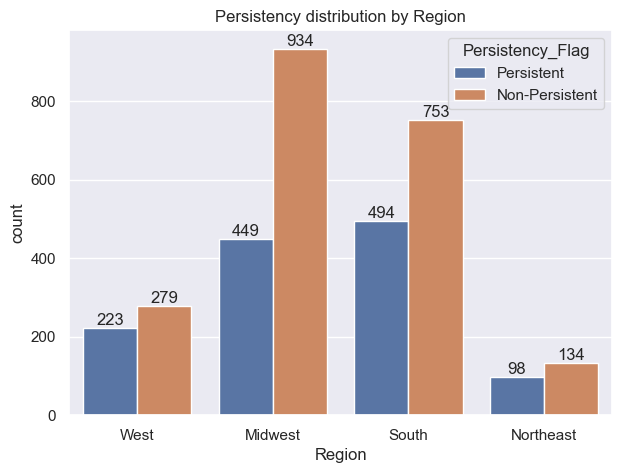

In [115]:
sns.set_theme(rc = {'figure.figsize':(7,5)})
ax = sns.countplot(x= 'Region', 
                   data= df, 
                   hue='Persistency_Flag')
ax.set_title('Persistency distribution by Region')
for label in ax.containers:
    ax.bar_label(label)

The feature, 'Region', would not contribute to the model, hence it should be dropped

In [116]:
df.drop('Region', axis = 1, inplace = True)

## NTM Physicians Attributes Analysis
> - NTM Physician specialist
> - Physician Specialist flag
> - Physician Specialist bucket

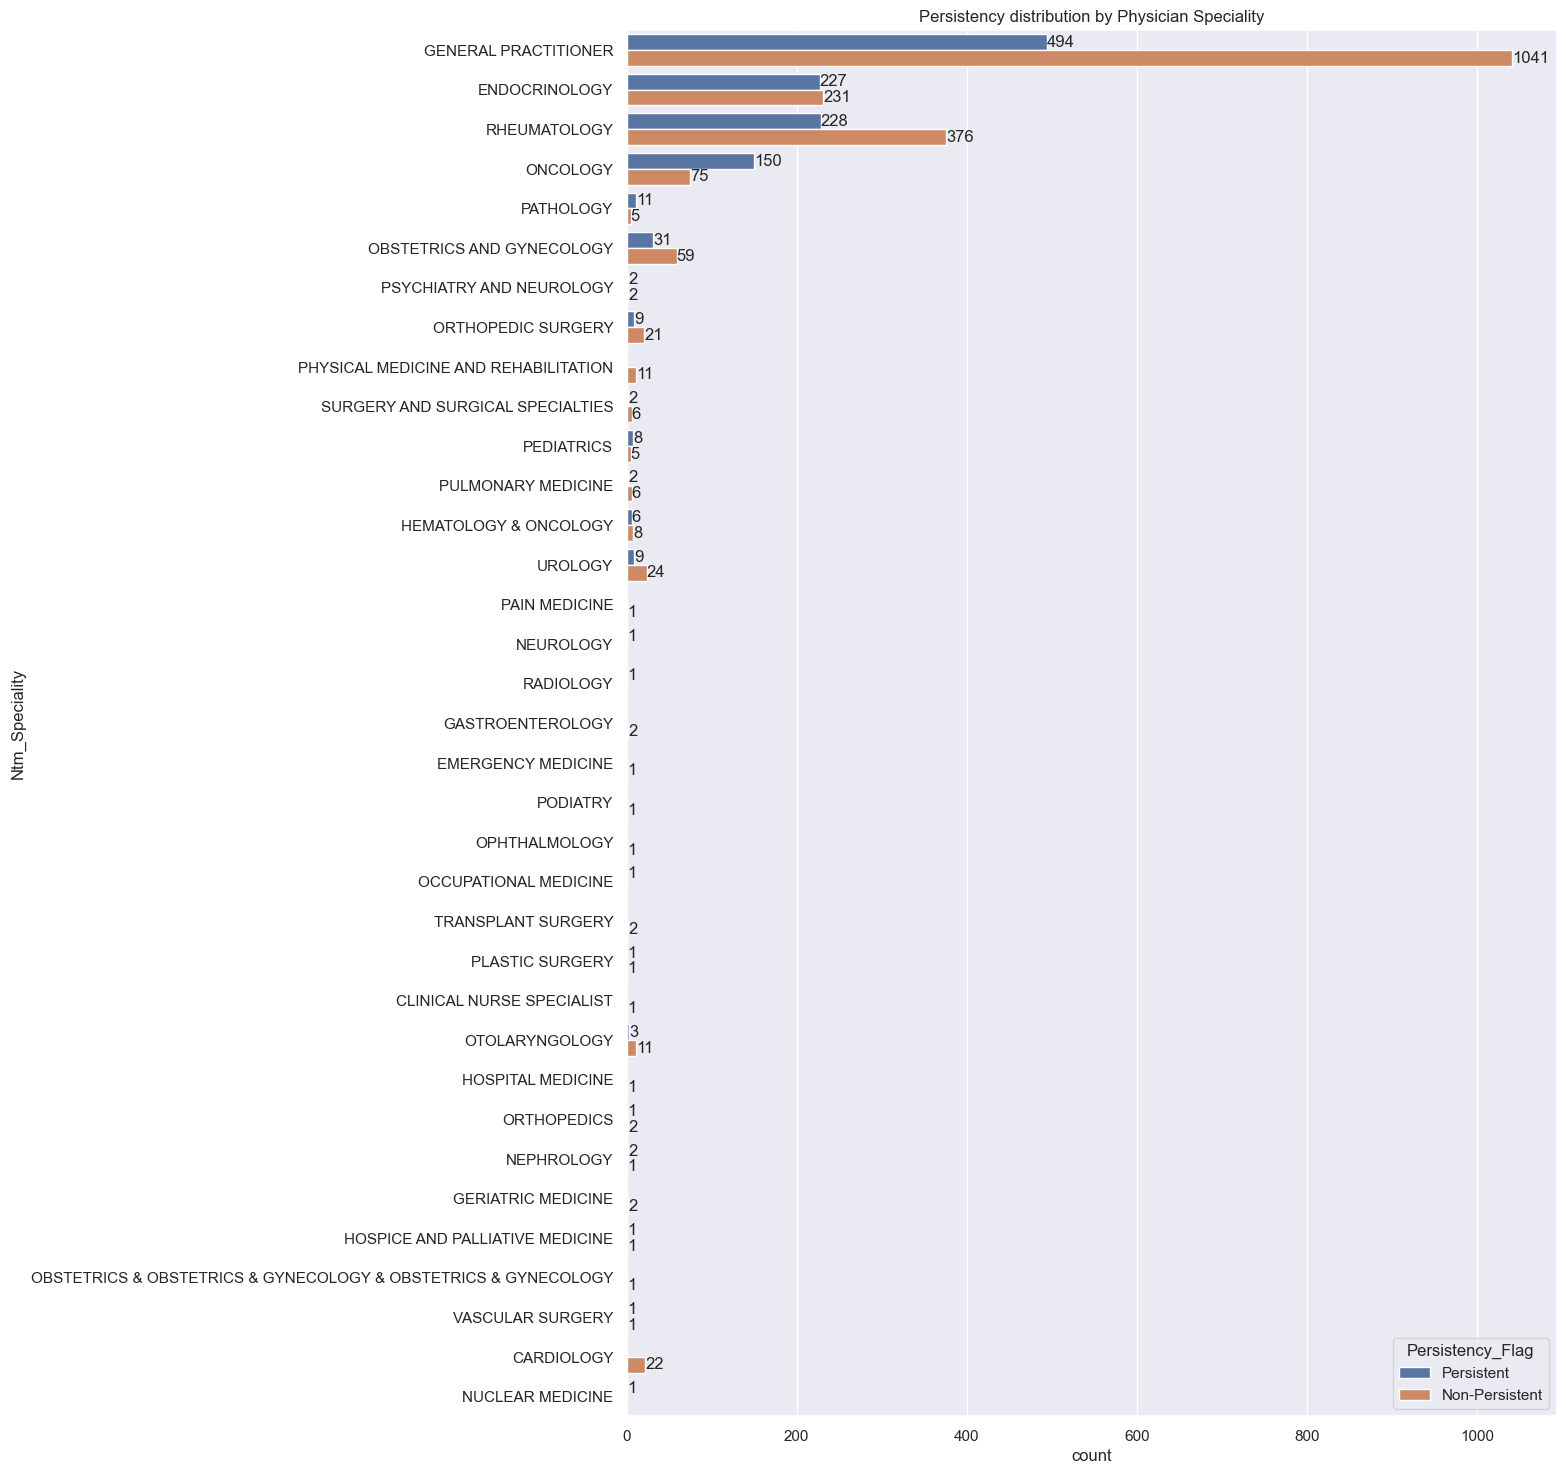

In [117]:
sns.set_theme(rc = {'figure.figsize':(12,18)})
ay = sns.countplot(y='Ntm_Speciality', 
                   data=df, 
                   hue='Persistency_Flag')
ay.set_title('Persistency distribution by Physician Speciality')
for label in ay.containers:
    ay.bar_label(label)

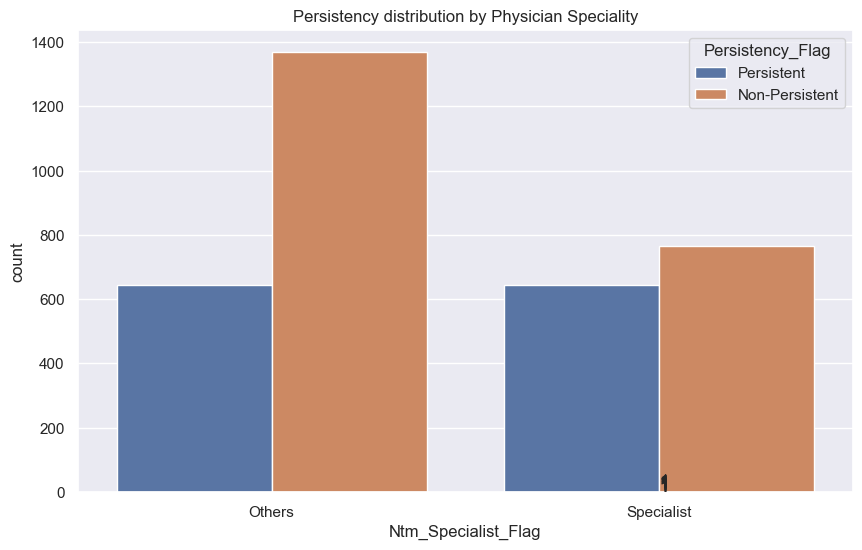

In [118]:
sns.set_theme(rc = {'figure.figsize':(10,6)})
ax = sns.countplot(x='Ntm_Specialist_Flag', 
                   data=df, 
                   hue='Persistency_Flag')
ax.set_title('Persistency distribution by Physician Speciality')
for label in ay.containers:
    ax.bar_label(label)

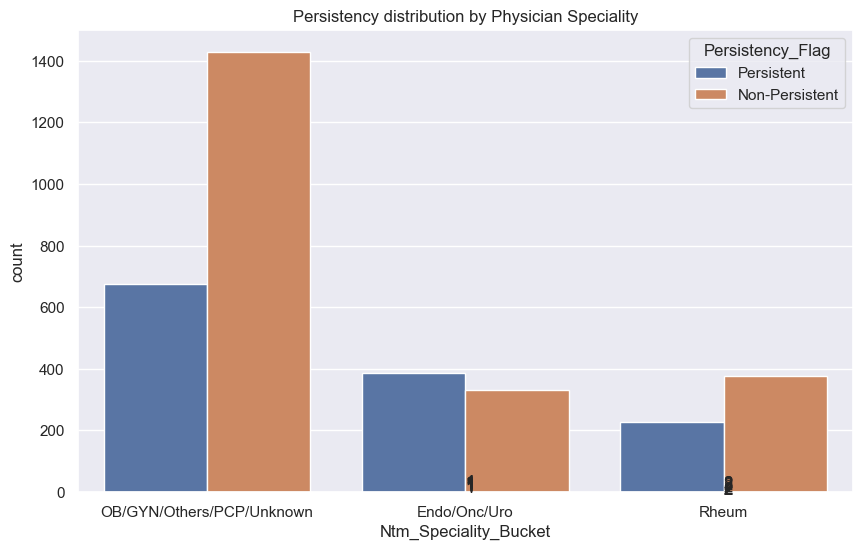

In [119]:
sns.set_theme(rc = {'figure.figsize':(10,6)})
ax = sns.countplot(x='Ntm_Speciality_Bucket', 
                   data=df, 
                   hue='Persistency_Flag')
ax.set_title('Persistency distribution by Physician Speciality')
for label in ay.containers:
    ax.bar_label(label)

The three features are about the same attributes of the physician. Hence it is advisable to drop two of the features to redunce redunancy and bias. 

In [120]:
df.drop(['Ntm_Speciality', 'Ntm_Speciality_Bucket'], axis = 1, inplace = True)

## Clinical Factors

> - TScore
> - Risk Segment
> - DEXA
> - Fragility Fracture
> - Glucocorticoid 